In [17]:
# Instalación de librerías python necesarias
# !pip install requests
# !pip install beautifulsoup4
# !pip install pandas
# !pip install selenium

In [18]:
# Importación de librerías para extracción de datos web
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.edge.service import Service 
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
import time
import plotly.express as px
import matplotlib.pyplot as plt

In [19]:
# Ruta al EdgeDriver (Se ajusta según la ruta del sistema)
edge_driver_path = "C:/Users/USUARIO/OneDrive/Documentos/edgedriver_win64/msedgedriver.exe"
service = Service(edge_driver_path)

# Configurar el WebDriver
driver = webdriver.Edge(service=service)

# Navegar a la página de Amazon
driver.get('https://www.amazon.com')

# Esperar a que la página cargue
time.sleep(2)

# Encontrar la barra de búsqueda e ingresar texto
search_box = driver.find_element(By.ID, "twotabsearchtextbox")
search_box.send_keys("laptop")

# Enviar el formulario
search_box.send_keys(Keys.RETURN)

# Esperar a que los resultados carguen
time.sleep(2)

# Encontrar los elementos que contienen los precios de los productos
product_names = driver.find_elements(By.CSS_SELECTOR, ".a-size-medium.a-color-base.a-text-normal")

# Encontrar los elementos que contienen los precios de los productos
product_prices = driver.find_elements(By.CSS_SELECTOR, ".a-price-whole")

# Extraer los datos en listas
names = [name.text for name in product_names]
prices = [price.text.replace(',', '').replace('.', '').replace('$', '') for price in product_prices]

# Verificar y ajustar las longitudes de las listas
min_length = min(len(names), len(prices))
names = names[:min_length]
prices = prices[:min_length]

# Conversión de precios a tipo numérico
prices = pd.to_numeric(prices, errors="coerce")

# Cerrar el WebDriver
driver.quit()

# Crear el DataFrame
df = pd.DataFrame({
    "Nombre del Producto": names,
    "Precio": prices
})

# Mostrar el DataFrame
print(df)


                                  Nombre del Producto  Precio
0   Acer Aspire 3 A315-24P-R7VH Slim Laptop | 15.6...     279
1   HP Chromebook 14 inch Laptop, FHD Display, Int...     209
2   15.6 Inch Laptops, Windows 11 Laptop Computers...     679
3   16 Inch Laptop Computer, Gaming Laptop, 16GB R...     349
4   Laptop, 15.6 Inch Laptops, Windows 11 Computer...     999
5   HP Portable Laptop, Student and Business, 14" ...     197
6   HP 14 Laptop, Intel Celeron N4020, 4 GB RAM, 6...     176
7   Newest Gaming Laptop, Laptop with AMD Ryzen 7 ...    1699
8   16.0-inch Laptop, 16GB DDR4 512GB SSD, Newest ...     475
9   HP 17 Laptop, 17.3” HD+ Display, 11th Gen Inte...    1299
10  ACEMAGIC Laptop, Newest Windows 11 Laptop Comp...     249
11  HP Newest 14" Ultral Light Laptop for Students...     145
12  ASUS E410 Intel Celeron N4020 4GB 64GB 14-Inch...     404
13  HP Notebook Laptop, 15.6" HD Touchscreen, Inte...     479
14  Dell Inspiron 15 3000 3520 Business Laptop Com...     276
15  Lapt

In [20]:
fig = px.bar(df, x="Nombre del Producto", y="Precio", title="Precios de Computadores Portátiles")
fig.show()

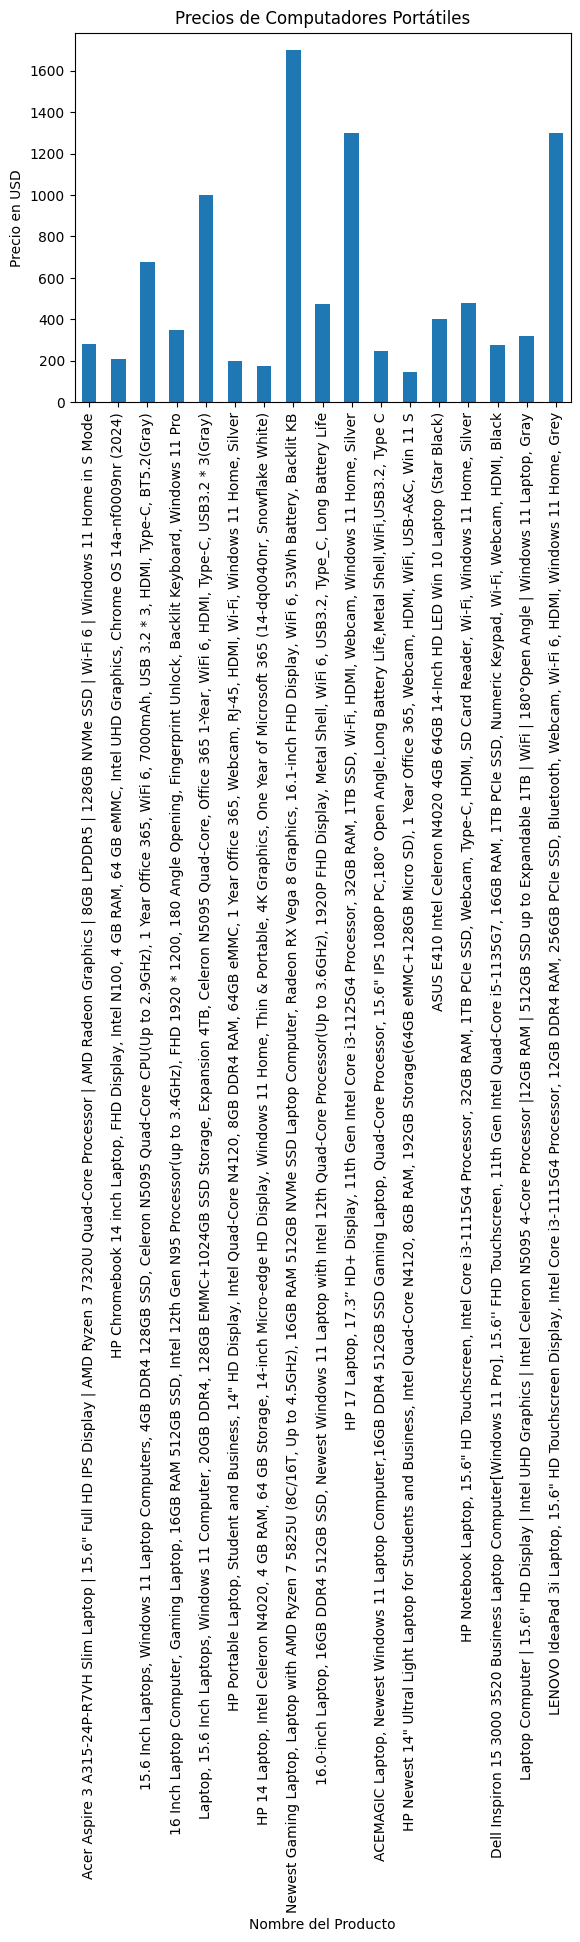

In [21]:
df.plot(kind="bar", x="Nombre del Producto", y="Precio", legend=False)
plt.ylabel("Precio en USD")
plt.title("Precios de Computadores Portátiles")
plt.xticks(rotation=90)
plt.show()